# Exemple de notebook avec OCaml

## Explications

Le kernel OCaml n'est pas installé par défaut avec Jupyter.

Il faut installer OPAM, puis [ocaml-jupyter](https://github.com/akabe/ocaml-jupyter/).

## Exemples

In [1]:
Sys.command "ocaml -version";;

The OCaml toplevel, version 4.05.0


- : int = 0


In [2]:
print_endline "Bonjour depuis OCaml !";;

Bonjour depuis OCaml !


- : unit = ()


### Une fonction récursive

Pour calculer la fonction $n! := 1 \times 2 \times \dots \times n$ ($n\in\mathbb{N}$), on peut penser à une solution récursive (qui coutera en espace mémoire à cause de la pile d'appel) et une solution impérative.

In [20]:
let rec fact (n: int) : int =
    match n with
    | 0 -> 1
    | n -> n * (fact (n-1))
;;

val fact : int -> int = <fun>


In [22]:
for i = 1 to 21 do
    print_endline (Printf.sprintf "fact(%.2i) = %i" i (fact i))
done;;


fact(01) = 1
fact(02) = 2
fact(03) = 6
fact(04) = 24
fact(05) = 120
fact(06) = 720
fact(07) = 5040
fact(08) = 40320
fact(09) = 362880
fact(10) = 3628800
fact(11) = 39916800
fact(12) = 479001600
fact(13) = 6227020800
fact(14) = 87178291200
fact(15) = 1307674368000
fact(16) = 20922789888000
fact(17) = 355687428096000
fact(18) = 6402373705728000
fact(19) = 121645100408832000
fact(20) = 2432902008176640000
fact(21) = -4249290049419214848


- : unit = ()


Et la solution impérative :

In [23]:
let fact_imp (n: int) : int =
    let f = ref 1 in
    for i = 1 to n do
        f := (!f) * i;
    done;
    !f
;;

val fact_imp : int -> int = <fun>


In [32]:
for i = 15 to 21 do
    print_endline (Printf.sprintf "fact(%.2i) = %i" i (fact_imp i))
done;;


fact(15) = 1307674368000
fact(16) = 20922789888000
fact(17) = 355687428096000
fact(18) = 6402373705728000
fact(19) = 121645100408832000
fact(20) = 2432902008176640000
fact(21) = -4249290049419214848


- : unit = ()


Comme les entiers sont bornés, on dépasse la capacité assez rapidement, et les valeurs calculées deviennent fausses.

### Un type non paramétrique récursif et un exemple :

In [34]:
type formulePropositionnelle =
    | Var of string
    | Non of formulePropositionnelle
    | Ou of (formulePropositionnelle * formulePropositionnelle)
    | Et of (formulePropositionnelle * formulePropositionnelle)
;;

type formulePropositionnelle =
    Var of string
  | Non of formulePropositionnelle
  | Ou of (formulePropositionnelle * formulePropositionnelle)
  | Et of (formulePropositionnelle * formulePropositionnelle)


In [35]:
let x = Var("x")
and y = Var("y")
and z = Var("z")
;;

val x : formulePropositionnelle = Var "x"
val y : formulePropositionnelle = Var "y"
val z : formulePropositionnelle = Var "z"


In [36]:
let p1 = Ou(x, y)
and p2 = Et(y, z)
and p3 = Non(x)
;;

let p4 = Et(p1, p2);;
let p5 = Ou(p3, p4);;
let p6 = Non(p5);;

val p1 : formulePropositionnelle = Ou (Var "x", Var "y")
val p2 : formulePropositionnelle = Et (Var "y", Var "z")
val p3 : formulePropositionnelle = Non (Var "x")


val p4 : formulePropositionnelle =
  Et (Ou (Var "x", Var "y"), Et (Var "y", Var "z"))


val p5 : formulePropositionnelle =
  Ou (Non (Var "x"), Et (Ou (Var "x", Var "y"), Et (Var "y", Var "z")))


val p6 : formulePropositionnelle =
  Non (Ou (Non (Var "x"), Et (Ou (Var "x", Var "y"), Et (Var "y", Var "z"))))


In [37]:
let rec taille (formule: formulePropositionnelle) : int =
    match formule with
    | Var _ -> 1
    | Non phi -> 1 + taille phi
    | Et (phi1, phi2) | Ou (phi1, phi2) -> 1 + (taille phi1) + (taille phi2)
    (* | _ -> 0 *) (* cette ligne est inutile *)
;;

val taille : formulePropositionnelle -> int = <fun>


In [38]:
taille x;;
taille y;;
taille z;;

- : int = 1


- : int = 1


- : int = 1


In [39]:
taille p1;;
taille p2;;
taille p3;;

- : int = 3


- : int = 3


- : int = 2


Avec une fonction récursive terminale :

In [40]:
let taille (formule: formulePropositionnelle) : int =
    let rec aux acc = function
        | Var _ -> 1
        | Non phi -> aux (acc+1) phi
        | Et (phi1, phi2) | Ou (phi1, phi2) -> aux (aux (acc + 1) phi1) phi2
    in aux 0 formule
;;

val taille : formulePropositionnelle -> int = <fun>


In [41]:
taille p4;;
taille p5;;
taille p6;;

- : int = 1


- : int = 1


- : int = 1


### Un type paramétrique récursif et un exemple :

In [1]:
type 'a arbreBinaire = Feuille | Noeud of ('a arbreBinaire * 'a * 'a arbreBinaire);;

type 'a arbreBinaire =
    Feuille
  | Noeud of ('a arbreBinaire * 'a * 'a arbreBinaire)


In [6]:
let a0 = Feuille;;
(*
    1
  /   \
 F    F
*)
let a1 = Noeud(a0, 1, a0);;
(*
       2
     /   \
    1     F
  /   \
 F    F
*)
let a2 = Noeud(a1, 2, a0);;

val a0 : 'a arbreBinaire = Feuille


val a1 : int arbreBinaire = Noeud (Feuille, 1, Feuille)


val a2 : int arbreBinaire = Noeud (Noeud (Feuille, 1, Feuille), 2, Feuille)


In [7]:
let rec hauteur (arbre: 'a arbreBinaire) : int =
    match arbre with
    | Feuille -> 0
    | Noeud(g, _, d) -> 1 + max (hauteur g) (hauteur d)
;;

val hauteur : 'a arbreBinaire -> int = <fun>


In [8]:
hauteur a0;;
hauteur a1;;
hauteur a2;;

- : int = 0


- : int = 1


- : int = 2


### Afficher des valeurs

In [18]:
print_string "Hello world from jupyter-ocaml";;

- : unit = ()


In [19]:
flush_all();;

- : unit = ()


In [20]:
print_endline "Hello world from jupyter-ocaml";;

Hello world from jupyter-ocamlHello world from jupyter-ocaml


- : unit = ()


Ce comportement est assez perturbant avec `jupyter-ocaml`, [cf ce ticket](https://github.com/akabe/ocaml-jupyter/issues/162).

In [21]:
print_endline "Hello world from jupyter-ocaml";;

Hello world from jupyter-ocaml


- : unit = ()


Avec [`Printf.printf`](http://caml.inria.fr/pub/docs/manual-ocaml/libref/Printf.html#VALprintf), c'est encore plus facile :

In [22]:
let print = Printf.printf ;;

val print : ('a, out_channel, unit) format -> 'a = <fun>


In [23]:
print "Hello world from jupyter-ocaml\n%d + %d = %d\n" 1 2 (1 + 2);;

- : unit = ()


In [24]:
flush_all();;

Hello world from jupyter-ocaml
1 + 2 = 3


- : unit = ()


Avec une fonction autour de [`Printf.printf`](http://caml.inria.fr/pub/docs/manual-ocaml/libref/Printf.html#VALprintf), c'est encore encore plus facile :

In [32]:
let print s =
    print_endline s ;
    flush_all ()
;;

val print : string -> unit = <fun>


In [40]:
for _ = 1 to 3 do
    print (Printf.sprintf "Hello world from jupyter-ocaml\n%d + %d = %d" 1 2 (1 + 2))
done;;

Hello world from jupyter-ocaml
1 + 2 = 3
Hello world from jupyter-ocaml
1 + 2 = 3
Hello world from jupyter-ocaml
1 + 2 = 3


- : unit = ()


### Figures avec TikZ

Voir <https://github.com/jbn/itikz>

In [1]:
%load_ext itikz

error: compile_error

Il n'est pas *encore* possible d'utiliser des "magic commands" de IPython dans d'autres langages.
J'ai ouvert ces tickets : [#164](https://github.com/akabe/ocaml-jupyter/issues/164) et [#165](https://github.com/akabe/ocaml-jupyter/issues/165) sur [le projet ocaml-jupyter sur GitHub](https://github.com/akabe/ocaml-jupyter/).

Une solution intermédiaire, et assez facile d'utilisation en fait, est de temporairement changer le "kernel" pour utiliser Python, générer les figures, puis repasser à OCaml !

In [1]:
%load_ext itikz

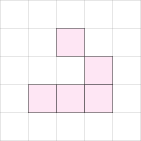

In [2]:
%%itikz --file-prefix tikz-figures-from-OCaml- --implicit-pic
\draw[help lines] grid (5, 5);
\draw[fill=magenta!10] (1, 1) rectangle (2, 2);
\draw[fill=magenta!10] (2, 1) rectangle (3, 2);
\draw[fill=magenta!10] (3, 1) rectangle (4, 2);
\draw[fill=magenta!10] (3, 2) rectangle (4, 3);
\draw[fill=magenta!10] (2, 3) rectangle (3, 4);

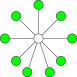

In [7]:
%%itikz --file-prefix tikz-figures-from-OCaml- --implicit-pic --scale=0.4
\tikzstyle{vertexcover} = [circle,fill=green,draw];
\tikzstyle{matching} = [ draw=blue!55, line width=5];
\tikzstyle{matchingN} = [ draw=green!55, line width=5];
\tikzstyle{vertex} = [circle,fill=none,draw];
\node[vertex] (v2) at (0,0) {};
\node[vertexcover] (v3) at (0,3) {};
\node[vertexcover] (v4) at (2,2) {};
\node[vertexcover] (v11) at (3,0) {};
\node[vertexcover] (v5) at (2,-2) {};
\node[vertexcover] (v6) at (1,-3) {};
\node[vertexcover] (v8) at (-1,-3) {};
\node[vertexcover] (v9) at (-2,-2) {};
\node[vertexcover] (v10) at (-3,0) {};
\node[vertexcover] (v1) at (-2,2) {};
\draw  (v1) edge (v2);
\draw  (v3) edge (v2);
\draw  (v4) edge (v2);
\draw  (v5) edge (v2);
\draw  (v6) edge (v2);
\draw  (v8) edge (v2);
\draw  (v9) edge (v2);
\draw  (v2) edge (v10);
\draw  (v2) edge (v11);

In [6]:
!ls tikz-figures-from-OCaml-*

tikz-figures-from-OCaml-c33720202396643581aed22f595383d4.svg
tikz-figures-from-OCaml-c33720202396643581aed22f595383d4.tex
tikz-figures-from-OCaml-f9a50e84b7fbf18e85525cc31a91a070.svg
tikz-figures-from-OCaml-f9a50e84b7fbf18e85525cc31a91a070.tex


### IPython magic, en OCaml avec un hack ?

Les commandes [IPython magic](https://ipython.readthedocs.io/en/stable/interactive/magics.html), comme utilisées ci-dessus (en basculant au kernel Python pour ces quelques cellules) sont très pratiques.

Un autre avantage sont les raccourcis, comme ceux là :

In [3]:
# cette cellule doit être exécutée avec le kernel Python
!ls *OCaml*nb
!pwd

'Exemple de notebook avec OCaml.ipynb'
/home/lilian/publis/Info-Prepas-MP2I/Modele-de-livre-avec-Jupyter-Book.git/notebooks


Pour certains commandes basiques, peut-être qu'on peut tricher un peu ?

In [5]:
let (! ) s =
    (* Sys.command ("echo "^s); *)
    Sys.command (s)
;;

val ( ! ) : string -> int = <fun>


In [10]:
!"ls *OCaml*nb";;
!"pwd";;

Exemple de notebook avec OCaml.ipynb


- : int = 0


/home/lilian/publis/Info-Prepas-MP2I/Modele-de-livre-avec-Jupyter-Book.git/notebooks


- : int = 0


On pourrait envisager de faire pareil pour d'autres "cell magics", en ouvrant un terminal IPython sous-jacent, avec `Sys.command`, et en lui envoyant le code de la cellule, puis en récupérant la sortie, et afficher la sortie comme une sortie normale, avec [`Jupyter_notebook.display`](https://akabe.github.io/ocaml-jupyter/api/jupyter/Jupyter_notebook/#val-display).

Je ne pense pas avoir le temps de bidouiller tout ça...

### D'autres exemples ?

TODO: plus tard !

## Pour en apprendre plus

- Ce petit tutoriel : <https://perso.crans.org/besson/apprendre-python.fr.html> (sous licence GPLv3) ;
- Ce WikiBooks : <https://fr.wikibooks.org/wiki/Programmation_Python> (sous licence libre) ;
- Ces deux livres de Python au niveau lycée : <https://github.com/exo7math/python1-exo7> et <https://github.com/exo7math/python2-exo7> (sous licence Creative Commons).